In [2]:
from pandas import read_csv, to_datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=13, titlesize=14)
plt.rc('legend', fontsize=12)

# L'Offre

## La diminuition dans le nombre de fermes laitières au Canada

In [2]:
fermes = read_csv('fermes_temps.csv', skiprows=7)
fermes['Québec et Ontario'] = (fermes.QC + fermes.ON)
fermes["Provinces de l'Ouest"] = (fermes.MB + fermes.SK + fermes.AB + fermes.BC)
fermes["Provinces de l'Atlantique"] = (fermes.NB + fermes.NS + fermes.PE + fermes.NL)
fermes['QC-ON'] = (fermes.QC + fermes.ON)/fermes.Canada
fermes['Ouest'] = (fermes.MB + fermes.SK + fermes.AB + fermes.BC)/fermes.Canada
fermes['Atlantique'] = (fermes.NB + fermes.NS + fermes.PE + fermes.NL)/fermes.Canada
fermes.head()

,Année,BC,AB,SK,MB,ON,QC,NB,NS,PE,NL,Canada,Québec et Ontario,Provinces de l'Ouest,Provinces de l'Atlantique,QC-ON,Ouest,Atlantique
0,2017,400,523,160,282,3613,5368,194,213,166,32,10951,8981,1365,605,0.820108,0.124646,0.055246
1,2016,417,531,159,285,3731,5546,199,221,168,32,11289,9277,1392,620,0.821773,0.123306,0.054921
2,2015,437,547,163,299,3834,5766,206,225,174,32,11683,9600,1446,637,0.821707,0.123770,0.054524
3,2014,455,566,166,308,3926,5894,206,229,180,32,11962,9820,1495,647,0.820933,0.124979,0.054088
4,2013,475,571,166,321,3997,6038,211,235,187,33,12234,10035,1533,666,0.820255,0.125307,0.054438


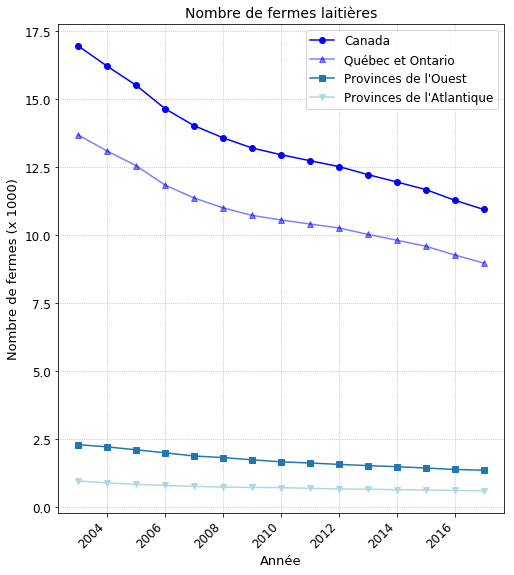

In [3]:
fig, ax = plt.subplots(figsize=(8, 10))
ax.plot(fermes['Année'], fermes.Canada/1000, marker = 'o', c = 'blue')
ax.plot(fermes['Année'], fermes['Québec et Ontario']/1000, c = 'blue',
        alpha = 0.5, marker = '^')
ax.plot(fermes['Année'], fermes["Provinces de l'Ouest"]/1000, marker = 's')
ax.plot(fermes['Année'], fermes["Provinces de l'Atlantique"]/1000, marker = 'v',
        c = 'lightblue')
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de fermes (x 1000)')
ax.set_title('Nombre de fermes laitières')
ax.grid(linestyle='dotted')
ax.legend()
fig.autofmt_xdate(rotation=45)
plt.show()

Source: [Centre Canadien d'Information Laitière (CCIL), Rapport D056 ](http://aimis-simia-cdic-ccil.agr.gc.ca/rp/index-fra.cfm?action=pR&r=720&pdctc=)

En 2017, on dénombrait 10951 fermes laitières au Canada, le Québec et l’Ontario accueillaient 82 % de ces fermes, les provinces de l’Ouest, 12,5 % et les provinces de l’Atlantique, 5,5 %.

## Le Producteurs Laitiers au Québec

Producteurs laitiers: nombre de producteurs distincts qui ont vendu du lait à la Fédération des producteurs de lait du Québec.

In [4]:
producteurs = read_csv('ProducteursLaitiers.csv', sep=';', skiprows=1,
                    parse_dates=['Temps'], infer_datetime_format=True)

producteurs = producteurs.rename(columns={"Élément statistique": "element",
                              "Territoire": "territoire",
                              "Temps": "temps",
                              "Unité de mesure": "unite",
                              "Valeur numérique": "valeur",
                              "Note": "note"})
#producteurs.head()

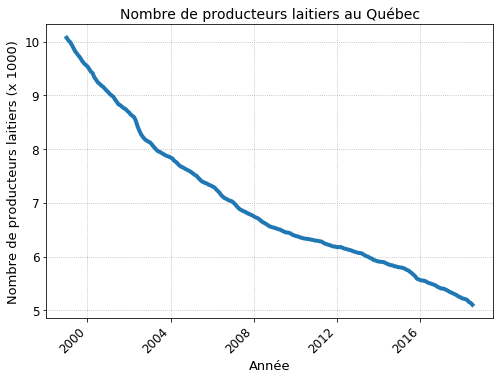

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(producteurs.temps, producteurs.valeur/1000, linewidth=4)
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de producteurs laitiers (x 1000)')
ax.set_title('Nombre de producteurs laitiers au Québec')
ax.grid(linestyle = 'dotted')

fig.autofmt_xdate(rotation=45)
plt.show()

Sources: Institut de la statistique du Québec (ISQ), Fédération des producteurs de lait du Québec (FPLQ)
<br>
Compilation: [Institut de la statistique du Québec](http://www.bdso.gouv.qc.ca/pls/ken/ken214_tabl_detl.page_detl?p_iden_tran=REPERK547XJ20-14125033193695l7&p_lang=1&p_id_ss_domn=1053&p_id_raprt=1969)

Le Québec compte actuellement 5106 producteurs laitiers (juillet 2018), un chiffre qui représente 50% de celui de 1999.

In [6]:
producteursG = producteurs.valeur.groupby(producteurs.temps.dt.year)
producteurs_year = producteursG.sum()/12

# Projection au prorata pour 2018.
producteurs_year[-1:] = producteurs_year[-1:]*12/7
producteurs_year.tail()

temps
2014    5862.000000
2015    5712.750000
2016    5502.750000
2017    5336.000000
2018    5178.714286
Name: valeur, dtype: float64

## Le Droit de Production au Québec - matière grasse (MG)

Depuis les années 1970, le système de gestion de l'offre pour le marché des produits laitiers (de volaille et d'oeufs aussi) est appliqué au Canada. C'est un mécanisme de contrôle de la production de manière à stabiliser les revenus et à éviter les surplus de production coûteux.

La Commission canadienne du lait ([CCL](http://www.cdc-ccl.gc.ca/CDC/index-fra.php?id=3781)) est une société d'État responsable de coordonner les politiques laitières fédérales et provinciales. La CCL établit chaque année le prix de soutien du beurre et de la poudre de lait écrémé, les coûts de productions à la ferme (CdP). Ces prix servent de référence aux offices de commercialisation provinciaux de mise en marché pour fixer le prix du lait de transformation dans chaque province. Dans le cas du Québec, cet office est la [Féderation des Producteurs de Lait du Québec (FPLQ)](http://lait.org/).

La CCL préside le Comité canadien de gestion des approvisionnements de lait (CCGAL) qui établit aussi chaque année un niveau cible pour la production nationale de **lait de transformation**, ou quota de mise en marché (QMM), sur la base de matière grasse (la composition standard d'un hectolitre de lait contient 3,6 kg de matière grasse), pour attendre aux besoins canadiens (demande). La CCL procède aussi une révision mensuel du QMM pour capter plus rapidement les variations importantes des marchés (**gestion en continu du quota**), soit les tendances de la demande et de l’offre (production laitière).

Le CCGAL applique les dispositions du Plan national de commercialisation du lait (PNCL) qui prévoit la part du QMM de chaque province et contient des dispositions pour le partage de toute augmentation ou diminution de ce quota.

Au Québec, les PLQ ont les pouvoirs délégués pour gérer la politique laitière provinciale.

In [7]:
quota = read_csv('DroitProductionMatiereGrasse.csv', sep=';', skiprows=1,
                    parse_dates=['Temps'], infer_datetime_format=True)

quota = quota.rename(columns={"Élément statistique": "element",
                              "1er niveau de détail": "detail",
                              "Territoire": "territoire",
                              "Temps": "temps",
                              "Unité de mesure": "unite",
                              "Valeur numérique": "valeur",
                              "Note": "note"})
quota.head()

,element,detail,territoire,temps,unite,valeur,note
0,Droit de production (matière grasse),Quotidien,Québec,1999-01-01,kg,288316,NaN
1,Droit de production (matière grasse),Quotidien,Québec,1999-02-01,kg,287350,NaN
2,Droit de production (matière grasse),Quotidien,Québec,1999-03-01,kg,287327,NaN
3,Droit de production (matière grasse),Quotidien,Québec,1999-04-01,kg,288583,NaN
4,Droit de production (matière grasse),Quotidien,Québec,1999-05-01,kg,288174,NaN


In [8]:
quota_q = quota[quota['detail'] == 'Quotidien']
quota_m = quota[quota['detail'] == 'Mensuel']

In [9]:
#quota_q.tail()
quota_m.tail()

,element,detail,territoire,temps,unite,valeur,note
465,Droit de production (matière grasse),Mensuel,Québec,2018-03-01,kg,12358259,NaN
466,Droit de production (matière grasse),Mensuel,Québec,2018-04-01,kg,11953051,NaN
467,Droit de production (matière grasse),Mensuel,Québec,2018-05-01,kg,12165295,NaN
468,Droit de production (matière grasse),Mensuel,Québec,2018-06-01,kg,11774861,NaN
469,Droit de production (matière grasse),Mensuel,Québec,2018-07-01,kg,11741991,NaN


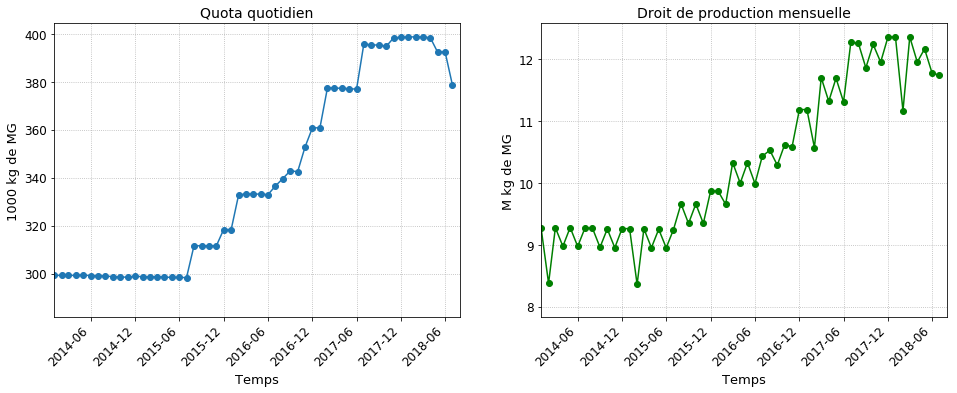

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.autofmt_xdate(rotation=45)

ax1.plot(quota_q.temps, quota_q.valeur/1000, marker = 'o')
ax1.set_xlim('01-2014','08-2018')
ax1.set_xlabel('Temps')
ax1.set_ylabel('1000 kg de MG')
ax1.set_title('Quota quotidien')
ax1.grid(linestyle = 'dotted')

ax2.plot(quota_m.temps, quota_m.valeur/(10**6), marker = 'o', c='g')
ax2.set_xlim('01-2014','08-2018')
ax2.set_xlabel('Temps')
ax2.set_ylabel('M kg de MG')
ax2.set_title('Droit de production mensuelle')
ax2.grid(linestyle = 'dotted')

plt.show()

Sources: Fédération des producteurs de lait du Québec (FPLQ)
<br>
Compilation: [Institut de la statistique du Québec (ISQ)](http://www.bdso.gouv.qc.ca/pls/ken/ken214_tabl_detl.page_detl?p_iden_tran=REPERK547XJ20-14125033193695l7&p_lang=1&p_id_ss_domn=1053&p_id_raprt=1969)

Il est important de noter que les quotas quotidien ou les droit de production mensuelle établis par les PLQ (quotidien et mensuel) sont gérés pour atendre le quota alloué au Québec (la cible de production) pour les 12 mois suivants.

### Est-ce que l'écart entre la production et les quotas provinciaux est stable dans le temps?

In [11]:
ecart = quota[quota['detail'] == '..Écart mensuel à la production']

In [12]:
ecart.tail()

,element,detail,territoire,temps,unite,valeur,note
700,Droit de production (matière grasse),..Écart mensuel à la production,Québec,2018-03-01,kg,21418,NaN
701,Droit de production (matière grasse),..Écart mensuel à la production,Québec,2018-04-01,kg,27065,NaN
702,Droit de production (matière grasse),..Écart mensuel à la production,Québec,2018-05-01,kg,57230,NaN
703,Droit de production (matière grasse),..Écart mensuel à la production,Québec,2018-06-01,kg,-132735,NaN
704,Droit de production (matière grasse),..Écart mensuel à la production,Québec,2018-07-01,kg,-331820,NaN


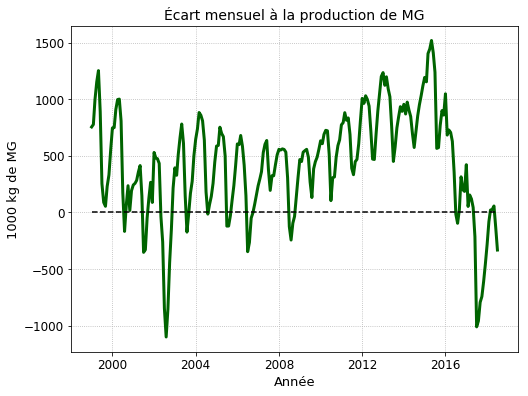

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
#fig.autofmt_xdate(rotation=45)

ax.plot(ecart.temps, ecart.valeur/1000,
        c = 'darkgreen', linewidth=3)
ax.plot(np.array(['1999-01', '2018-07'], dtype='datetime64'),
        (0,0), c = 'black', linestyle = 'dashed')
#ax.set_xlim('2016-01','2018-07')
ax.set_xlabel('Année')
ax.set_ylabel('1000 kg de MG')
ax.set_title('Écart mensuel à la production de MG')
ax.grid(linestyle = 'dotted')

plt.show()

Sources: Fédération des producteurs de lait du Québec (FPLQ)
<br>
Compilation: [Institut de la statistique du Québec (ISQ)](http://www.bdso.gouv.qc.ca/pls/ken/ken214_tabl_detl.page_detl?p_iden_tran=REPERK547XJ20-14125033193695l7&p_lang=1&p_id_ss_domn=1053&p_id_raprt=1969)

In [14]:
print('moyenne (x 1000 kg): %.i'% (ecart.valeur.mean()/1000))
print('écart-type (x 1000 kg): %.i'% (ecart.valeur.std()/1000))

moyenne (x 1000 kg): 434
écart-type (x 1000 kg): 466


La production mensuelle de matière grasse au Québec est restée en moyenne 434.000 kg au-dessus du droit à la production depuis l'an 2000. L'écart-type est 466.000 kg. Une saisonnalité annuelle est observée dans l'écart entre la production et les quotas. Les écarts minimum se produisent généralement au mois de juin. Les écarts positifs montrent que la production au Québec a dépassé le quota alloué ces dernières années.

In [15]:
ecartG = ecart.valeur.groupby(ecart.temps.dt.year)
ecart_year = ecartG.sum()

# Projection au prorata pour 2018.
ecart_year[2018] = ecart_year[2018]*12/7

ecart_year.tail()
#quota_m.tail()

temps
2014    10493466
2015    13040112
2016     4771357
2017    -3990941
2018    -1239102
Name: valeur, dtype: int64

## Le prix moyenne du lait à la ferme au Québec

In [16]:
prix = read_csv('PrixMoyenne.csv', sep=';', decimal=',', skiprows=1,
                    parse_dates=['Temps'], infer_datetime_format=True)

prix = prix.rename(columns={"Élément statistique": "element",
                            "1er niveau de détail": "detail1",
                            "2ème niveau de détail": "detail2",
                            "3ème niveau de détail": "detail3",
                            "Territoire": "territoire",
                            "Temps": "temps",
                            "Unité de mesure": "unite",
                            "Valeur numérique": "valeur",
                            "Note": "note"})
#prix.head()

In [17]:
prix_b = prix[(prix['detail1'] == 'Total (Type de production ou marché)') &
              (prix['detail2'] == 'Total (Composantes laitières)') &
              (prix['detail3'] == '..Montant brut')]
prix_b = prix_b.rename(columns={'valeur': 'Prix moyen brut au Québec'})

In [18]:
prix_b.tail()

,element,detail1,detail2,detail3,territoire,temps,unite,Prix moyen brut au Québec,note
230,Prix moyen du lait,Total (Type de production ou marché),Total (Composantes laitières),..Montant brut,Québec,2018-03-01,$/hl,75.0989,NaN
231,Prix moyen du lait,Total (Type de production ou marché),Total (Composantes laitières),..Montant brut,Québec,2018-04-01,$/hl,72.1910,NaN
232,Prix moyen du lait,Total (Type de production ou marché),Total (Composantes laitières),..Montant brut,Québec,2018-05-01,$/hl,74.5614,NaN
233,Prix moyen du lait,Total (Type de production ou marché),Total (Composantes laitières),..Montant brut,Québec,2018-06-01,$/hl,72.7757,NaN
234,Prix moyen du lait,Total (Type de production ou marché),Total (Composantes laitières),..Montant brut,Québec,2018-07-01,$/hl,73.3016,NaN


In [19]:
prix_bG = prix_b['Prix moyen brut au Québec'].groupby(prix_b.temps.dt.year)
prix_b_year = prix_bG.sum()/12

# Projection au prorata pour 2018.
prix_b_year[2018] = prix_b_year[2018]*12/7

In [20]:
prix_b_year.tail()

temps
2014    83.009325
2015    78.574733
2016    78.258592
2017    77.691883
2018    74.497900
Name: Prix moyen brut au Québec, dtype: float64

In [21]:
prix_n = prix[(prix['detail1'] == 'Total (Type de production ou marché)') &
              (prix['detail2'] == 'Total (Composantes laitières)') &
              (prix['detail3'] == '..Montant net')]
prix_n = prix_n.rename(columns={'valeur': 'Prix moyen net au Québec'})

In [22]:
prix_nG = prix_n['Prix moyen net au Québec'].groupby(prix_n.temps.dt.year)
prix_n_year = prix_nG.sum()/12

# Projection au prorata pour 2018.
prix_n_year[2018] = prix_n_year[2018]*12/7

In [23]:
# le coût de production à la ferme (CCL)
CdP = read_csv('CdP.csv')

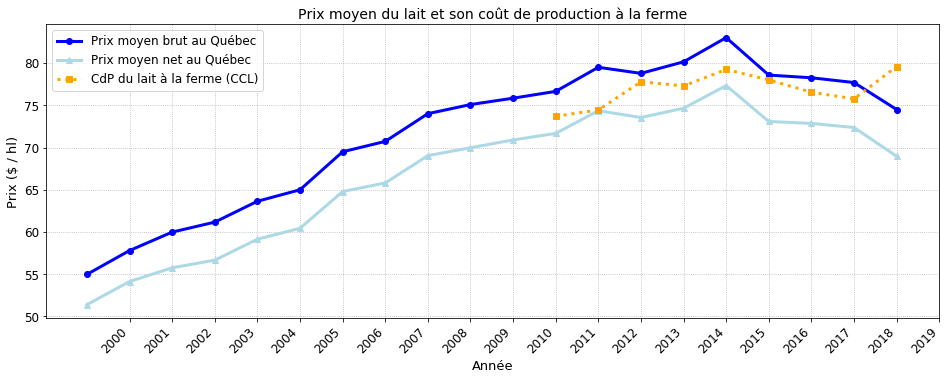

In [24]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(np.arange(1999, 2019, step=1),
        prix_b_year, marker = 'o', c = 'blue', linewidth=3)
ax.plot(np.arange(1999, 2019, step=1),
        prix_n_year, marker = '^', c = 'lightblue', linewidth=3)
ax.plot(CdP['Année'], CdP['CdP du lait à la ferme (CCL)'],
        marker = 's', c = 'orange', linestyle='dotted', linewidth=3)
ax.set_title('Prix moyen du lait et son coût de production à la ferme')

ax.set_xticks(np.arange(2000, 2020, step=1))
ax.set_xlabel('Année')
ax.set_ylabel('Prix ($ / hl)')
ax.grid(linestyle = 'dotted')
ax.legend()
fig.autofmt_xdate(rotation=45)
plt.show()

Sources: Fédération des producteurs de lait du Québec (FPLQ), [Commission Canadienne du lait (CCL)](http://www.cdc-ccl.gc.ca/CDC/index-fra.php?link=209)
<br>
Compilations: [Institut de la statistique du Québec (ISQ)](http://www.bdso.gouv.qc.ca/pls/ken/ken214_tabl_detl.page_detl?p_iden_tran=REPERK547XJ20-14125033193695l7&p_lang=1&p_id_ss_domn=1053&p_id_raprt=1969)

Le prix moyen à la ferme au Québec est resté au dessus des coûts depuis 2010. Cepandant, le comportement des prix s'est inversé au cours de la dernière année ([La dégringolade du prix du lait inquiète les producteurs laitiers, radio-canada](https://ici.radio-canada.ca/nouvelle/1101805/baisse-prix-lait-inquietude-producteurs-laitiers)).

## La Production, les Frais et les Recettes Laitières au Québec 

### La production

In [25]:
# La prduction du lait au Québec javier 1999 - julliet 2018 (PLQ)

production = read_csv('Production.csv', sep=';', decimal=',', skiprows=1,
                    parse_dates=['Temps'], infer_datetime_format=True)

production = production.rename(columns={"Élément statistique": "element",
                            "1er niveau de détail": "detail1",
                            "2ème niveau de détail": "detail2",
                            "Territoire": "territoire",
                            "Temps": "temps",
                            "Unité de mesure": "unite",
                            "Valeur numérique": "valeur",
                            "Note": "note"})
#production.head()

In [26]:
prod_lait = production[(production.detail1 == 'Total (Type de production ou marché)') &
                       (production.detail2 == 'Total (Composantes laitières)')]
prod_lait.tail()

,element,detail1,detail2,territoire,temps,unite,valeur,note
230,Production laitière,Total (Type de production ou marché),Total (Composantes laitières),Québec,2018-03-01,hl,2932078.73,NaN
231,Production laitière,Total (Type de production ou marché),Total (Composantes laitières),Québec,2018-04-01,hl,2835211.42,NaN
232,Production laitière,Total (Type de production ou marché),Total (Composantes laitières),Québec,2018-05-01,hl,2925285.06,NaN
233,Production laitière,Total (Type de production ou marché),Total (Composantes laitières),Québec,2018-06-01,hl,2820540.22,NaN
234,Production laitière,Total (Type de production ou marché),Total (Composantes laitières),Québec,2018-07-01,hl,2822621.42,NaN


In [27]:
prod_laitG = prod_lait.valeur.groupby(prod_lait.temps.dt.year)
prod_lait_year = prod_laitG.sum()

# Projection au prorata pour 2018.
prod_lait_year[-1:] = prod_lait_year[-1:]*12/7

In [28]:
production_producteur = prod_lait_year/producteurs_year

In [29]:
#prod_lait_year.tail()

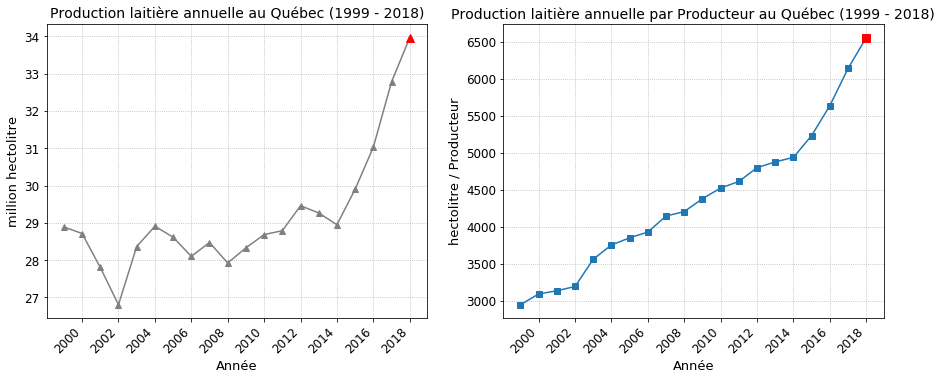

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1.plot(np.arange(1999, 2019, step=1),
         prod_lait_year/10**6, marker = '^', c = 'grey')
ax1.plot(prod_lait_year[-1:]/10**6, marker = '^', c = 'red', markersize = 8)

ax1.set_xticks(np.arange(2000, 2020, step=2))
ax1.set_xlabel('Année')
ax1.set_ylabel('million hectolitre')
ax1.set_title('Production laitière annuelle au Québec (1999 - 2018)')
ax1.grid(linestyle = 'dotted')

ax2.plot(np.arange(1999, 2019, step=1),
         production_producteur, marker = 's')
ax2.plot(prod_lait_year[-1:]/producteurs_year[-1:], marker = 's', c = 'red', markersize = 8)
ax2.set_xticks(np.arange(2000, 2020, step=2))
ax2.set_xlabel('Année')
ax2.set_ylabel('hectolitre / Producteur')
ax2.set_title('Production laitière annuelle par Producteur au Québec (1999 - 2018)')
ax2.grid(linestyle = 'dotted')

fig.autofmt_xdate(rotation=45)
plt.show()

Les symboles rouges représentent les projections au prorata pour 2018.
<br>
Sources: Institut de la statistique du Québec (ISQ), Fédération des producteurs de lait du Québec (FPLQ)
<br>
Compilation: [Institut de la statistique du Québec](http://www.bdso.gouv.qc.ca/pls/ken/ken214_tabl_detl.page_detl?p_iden_tran=REPERK547XJ20-14125033193695l7&p_lang=1&p_id_ss_domn=1053&p_id_raprt=1969)

Une augmentation de la production par producteur ces dernières années est observée. Cela, allié à la vérification d'un taux élevé de réduction du nombre de fermes par an à partir de 2014, indique la sortie des petits producteurs du marché laitiers au Québec.

### Est-ce que l'écart entre la production du Québec et son quota total alloué est stable dans le temps?

In [31]:
prod_lait_mg = production[(production.detail1 == 'Total (Type de production ou marché)') &
                       (production.detail2 == 'Matière grasse')]
prod_lait_mg.tail()

,element,detail1,detail2,territoire,temps,unite,valeur,note
465,Production laitière,Total (Type de production ou marché),Matière grasse,Québec,2018-03-01,kg,12379676.0,NaN
466,Production laitière,Total (Type de production ou marché),Matière grasse,Québec,2018-04-01,kg,11980116.0,NaN
467,Production laitière,Total (Type de production ou marché),Matière grasse,Québec,2018-05-01,kg,12222525.0,NaN
468,Production laitière,Total (Type de production ou marché),Matière grasse,Québec,2018-06-01,kg,11642126.0,NaN
469,Production laitière,Total (Type de production ou marché),Matière grasse,Québec,2018-07-01,kg,11410171.0,NaN


In [32]:
prod_lait_mgG = prod_lait_mg.valeur.groupby(prod_lait_mg.temps.dt.year)
prod_lait_mg_year = prod_lait_mgG.sum()

# Projection au prorata pour 2018.
prod_lait_mg_year[2018] = prod_lait_mg_year[2018]*12/7

In [33]:
quota_mG = quota_m.valeur.groupby(quota_m.temps.dt.year)
quota_y = quota_mG.sum()

# Projection au prorata pour 2018.
quota_y[2018] = quota_y[2018]*12/7

quota_y.tail()
#quota_m.tail()

temps
2014    109135282
2015    111168064
2016    123797137
2017    140707112
2018    143176390
Name: valeur, dtype: int64

In [34]:
# Répartition du quota de lait total1 - 1erAOÛT 2017
qtplus = read_csv('qt_plus.csv')
qtplus['cible_1er_Août'] = qtplus['Année'] + (7/12)
qtplus.tail()

,Année,BC,AB,SK,MB,MCLO,ON,QC,NB,NS,PE,P5,NL,CA,cible_1er_Août
6,2014.00,26.01,26.77,9.75,13.51,76.03,98.48,124.08,4.43,5.39,4.53,236.91,1.96,314.91,2014.583333
7,2015.00,26.68,27.65,9.86,13.84,78.04,100.82,126.54,4.33,5.41,4.55,241.64,1.97,321.65,2015.583333
8,2016.00,30.08,29.89,10.41,14.54,84.91,111.80,128.86,5.89,7.56,4.43,258.54,2.54,345.99,2016.583333
9,2017.00,32.58,32.37,11.28,15.75,91.98,118.61,136.71,6.25,8.02,4.70,274.29,2.69,368.96,2017.583333
10,2017.42,NaN,NaN,NaN,NaN,NaN,NaN,140.05,NaN,NaN,NaN,NaN,NaN,NaN,2018.003333


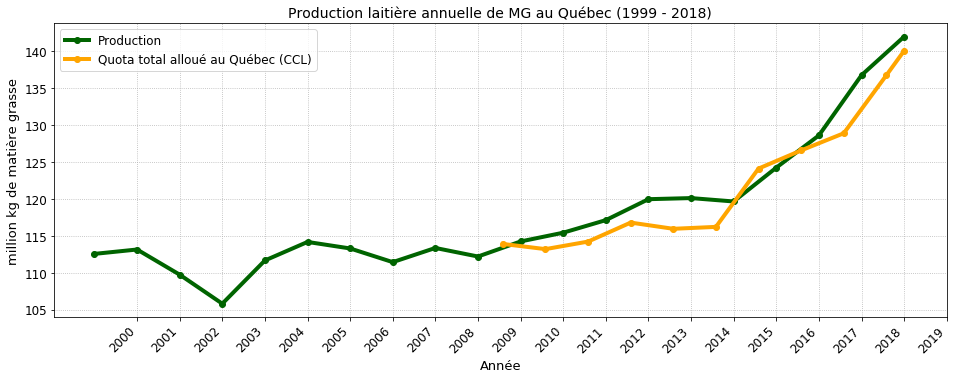

In [35]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(np.arange(1999, 2019, step=1),
        prod_lait_mg_year/10**6, c = 'darkgreen', linewidth = 4,
        label = 'Production', marker = 'o')

#ax.plot(np.arange(1999, 2019, step=1),
#        quota_y/10**6, c = 'darkgreen', alpha=0.5, linewidth = 4,
#        label = 'Droit de production annuelle (PLQ)', marker = 'o')

ax.plot(qtplus['cible_1er_Août'],
        qtplus.QC, c = 'orange', linewidth = 4,
        label = 'Quota total alloué au Québec (CCL)', marker = 'o')

# quelques valeurs de production totale établies au cours de l'année laitière
# (Rapport Annuel 08/2012-08/2017, PLQ)
#y = np.array([120535538, 118971759,
#              123000613, 126250658,
#              133376216])/10**6
#x = np.arange(2012.58, 2017.58, step=1)
#ax.scatter(x, y, c = 'darkgreen', marker = 'o')

ax.set_xticks(np.arange(2000, 2020, step=1))
ax.set_xlabel('Année')
ax.set_ylabel('million kg de matière grasse')
ax.set_title('Production laitière annuelle de MG au Québec (1999 - 2018)')
ax.grid(linestyle = 'dotted')

ax.legend()
fig.autofmt_xdate(rotation=45)
plt.show()

Sources: Fédération des producteurs de lait du Québec (FPLQ), [Centre Canadien d'Information Laitière (CCIL)](http://www.dairyinfo.gc.ca/index_f.php?s1=dff-fcil&s2=quota&s3=if-tc)
<br>
Compilation: [Institut de la statistique du Québec](http://www.bdso.gouv.qc.ca/pls/ken/ken214_tabl_detl.page_detl?p_iden_tran=REPERK547XJ20-14125033193695l7&p_lang=1&p_id_ss_domn=1053&p_id_raprt=1969)

Le point pour la production de 2018 représentent une projection au prorata.

In [36]:
(prod_lait_mg_year/10**6).tail().round(2)
#production_producteur.tail()

temps
2014    119.63
2015    124.21
2016    128.57
2017    136.72
2018    141.94
Name: valeur, dtype: float64

In [37]:
qtplus.iloc[:,[7,14]].tail()

,QC,cible_1er_Août
6,124.08,2014.583333
7,126.54,2015.583333
8,128.86,2016.583333
9,136.71,2017.583333
10,140.05,2018.003333


On observe une croissance importante de la production (hausse du quota) à partir de 2014. On doit montrer que cella est dû à une croissance de la demande de matière grasse pour le lait de transformation au cours des dernières années ([Rapport annuel de gestion 2016-2017, RMAAQ](http://www.rmaaq.gouv.qc.ca//index.php?id=12)).

La production a légèrement dépassé le quota total alloué au Québec et la tolérance positive au cours des deux dernières années. La CCGAL a prolongé la suspension de l’application des flexibilités associées au quota continu, soit 0,5 % en tolérance positive et 1,5 % en tolérance négative jusqu’en juillet 2018 ([Rapport Annuel 2017, PLQ](http://lait.org/notre-organisation/rapport-annuel/)). Mais au 1er juin 2018, le CCGAL a pris la décision de remettre en vigueur la politique relative aux dépassements de quota et à la sous-production.

### Les frais et les recettes

In [38]:
frais = read_csv('Frais.csv', sep=';', decimal=',', skiprows=1,
                    parse_dates=['Temps'], infer_datetime_format=True)

frais = frais.rename(columns={"Élément statistique": "element",
                            "1er niveau de détail": "detail",
                            "Territoire": "territoire",
                            "Temps": "temps",
                            "Unité de mesure": "unite",
                            "Valeur numérique": "valeur",
                            "Note": "note"})
#frais.head()

In [39]:
frais_total = frais[frais.detail == 'Total (Nature des frais)']

In [40]:
#frais_total.tail()

In [41]:
frais_totalG = frais_total.valeur.groupby(frais_total.temps.dt.year)
frais_total_year = frais_totalG.sum()

# Projection au prorata pour 2018.
frais_total_year[-1:] = frais_total_year[-1:]*12/7

In [42]:
frais_total_year.tail()

temps
2014    164331.3
2015    164179.9
2016    167546.2
2017    174426.1
2018    188016.0
Name: valeur, dtype: float64

In [43]:
recettes = read_csv('Recettes.csv', sep=';', decimal=',', skiprows=1,
                    parse_dates=['Temps'], infer_datetime_format=True)

recettes = recettes.rename(columns={"Élément statistique": "element",
                            "1er niveau de détail": "detail1",
                            "2ème niveau de détail": "detail2",
                            "3ème niveau de détail": "detail3",
                            "4ème niveau de détail": "detail4",
                            "Territoire": "territoire",
                            "Temps": "temps",
                            "Unité de mesure": "unite",
                            "Valeur numérique": "valeur",
                            "Note": "note"})
#recettes.head()

In [44]:
recettes_brutes = recettes[(recettes.detail1 == 'Total (Type de production ou marché)') &
                          (recettes.detail2 == 'Total (Composantes laitières)') &
                          (recettes.detail3 == '..Montant brut') &
                          (recettes.detail4 == 'Total (Provenance)')]

In [45]:
#recettes_brutes.tail()

### Quelle est la progression de l'industrie laitière (production) au Québec au cours des dix dernières années ?

In [46]:
recettes_brutesG = recettes_brutes.valeur.groupby(recettes_brutes.temps.dt.year)
recettes_brutes_year = recettes_brutesG.sum()

# Projection au prorata pour 2018.
recettes_brutes_year[-1:] = recettes_brutes_year[-1:]*12/7

In [47]:
recettes_brutes_year.tail(12)
#frais_total_year.tail()

temps
2007    2.106352e+06
2008    2.095569e+06
2009    2.148786e+06
2010    2.198052e+06
2011    2.287681e+06
2012    2.320778e+06
2013    2.344613e+06
2014    2.402988e+06
2015    2.348270e+06
2016    2.429029e+06
2017    2.546463e+06
2018    2.530059e+06
Name: valeur, dtype: float64

In [48]:
# fraction des frais dans les recettes brutes
(frais_total_year * 100 / recettes_brutes_year).mean().round(2)

6.83

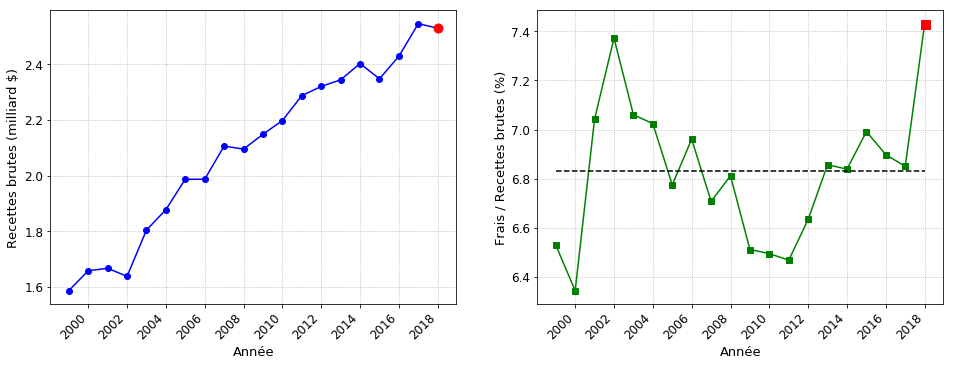

In [49]:
#fig, ax = plt.subplots(figsize=(8, 6))
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))


ax1.plot(np.arange(1999, 2019, step=1), recettes_brutes_year/10**6,
        marker = 'o', c = 'b')
ax1.plot(recettes_brutes_year[-1:]/10**6, marker = 'o', c = 'r', markersize = 9)
ax1.set_xticks(np.arange(2000, 2020, step=2))
ax1.set_xlabel('Année')
ax1.set_ylabel('Recettes brutes (milliard $)')
ax1.grid(linestyle = 'dotted')

ax2.plot(np.arange(1999, 2019, step=1), frais_total_year * 100 /
        recettes_brutes_year, marker = 's', c = 'green')
ax2.plot(frais_total_year[-1:] * 100 /
        recettes_brutes_year[-1:], marker = 's', c = 'r', markersize = 9)
ax2.plot((1999,2018),(6.83,6.83), c='black', linestyle='dashed')
ax2.set_xticks(np.arange(2000, 2020, step=2))
ax2.set_xlabel('Année')
ax2.set_ylabel('Frais / Recettes brutes (%)')
ax2.grid(linestyle = 'dotted')

fig.autofmt_xdate(rotation=45)

plt.show()

Les symboles rouges représentent des estimations au prorata pour 2018.
<br><br>
Sources: Institut de la statistique du Québec (ISQ), Fédération des producteurs de lait du Québec (FPLQ)
<br>
Compilation: [Institut de la statistique du Québec](http://www.bdso.gouv.qc.ca/pls/ken/ken214_tabl_detl.page_detl?p_iden_tran=REPERK547XJ20-14125033193695l7&p_lang=1&p_id_ss_domn=1053&p_id_raprt=1969)

Au cours des dix dernières années les recettes bruttes de la production latière au Québec ont augmenté de 5%, escomptés à l'inflation ([IPC](https://www.banqueducanada.ca/taux/renseignements-complementaires/feuille-de-calcul-de-linflation/)) au cours de la période (16%). Pendant la même période, la production de lait est passé de 2,11 à 2,55 millions de hectolitres par année, soit une croissance de 15%. On a vu (figure ci-dessus - **Production laitière annuelle**) qu'une partie importante de cette augmentation s'est produite au cours des trois dernières années.

Les frais de mise en marché du lait au Québec s'élevent à environ 7%. Ils sont composés de:
Administration du plan conjoint, Publicité, Fonds de développement, Transport, Pénalité de qualité, Pénalité sur le lait canadien de qualité, Cotisation UPA, Administration du babillard, TPS, TVQ.

### La Transformation

### La Comsommation

### Livraisons manufacturières de lait et produits laitiers au Canada

In [50]:
livraisons = read_csv('livraisons.csv', skiprows=9)
#livraisons.head()

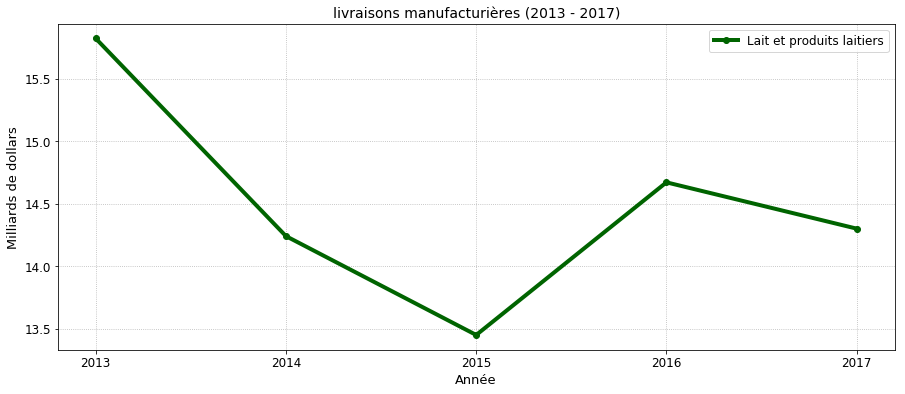

In [51]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(livraisons.annee,
        livraisons.valeur, c = 'darkgreen', linewidth = 4,
        marker = 'o', label='Lait et produits laitiers')
ax.set_xticks(np.arange(2013, 2018, step=1))
ax.set_xlabel('Année')
ax.set_ylabel('Milliards de dollars')
ax.set_title('livraisons manufacturières (2013 - 2017)')
ax.grid(linestyle = 'dotted')
ax.legend()

plt.show()

Source : Statistique Canada; Compilé par AAC-DIA, Section de l'Information sur les marchés

# La Demande

## Revue des Marchés

In [52]:
demande = read_csv('demande.csv')

In [53]:
demande.head(12)

,Année,Demande Total,Lait de Transformation,Lait de Consommation,P5,Provinces de l'ouest,Programmes d'Innovation,Production
0,2017,368.75,253.49,114.06,76.83,35.89,1.20,369.24
1,2016,354.27,239.03,114.08,76.55,36.03,1.16,344.53
2,2015,332.59,217.19,115.48,78.02,35.98,NaN,NaN
3,2014,323.72,202.04,116.17,79.03,35.61,NaN,316.78
4,2013,313.51,193.67,114.92,79.26,35.66,NaN,NaN
5,2012,307.11,191.07,116.04,79.88,36.16,NaN,NaN
6,2011,NaN,189.41,NaN,NaN,NaN,NaN,NaN
7,2010,NaN,185.04,NaN,NaN,NaN,NaN,NaN


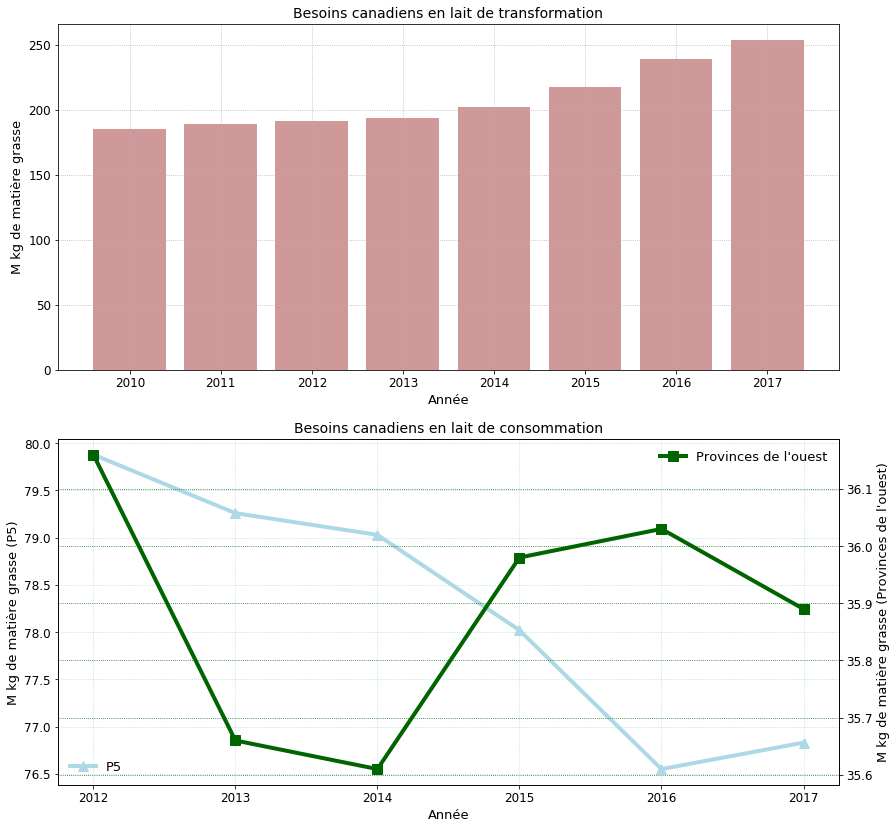

In [54]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

ax1.bar(demande['Année'], demande['Lait de Transformation'],
        color='darkred', alpha = 0.4)
ax1.set_xlabel('Année')
ax1.set_ylabel('M kg de matière grasse')
ax1.set_title('Besoins canadiens en lait de transformation')
ax1.grid(linestyle = 'dotted')

ax2.plot(demande['Année'], demande['P5'], marker = '^',
         color='lightblue', linewidth=4, markersize = 10)
ax2.set_xlabel('Année')
ax2.set_ylabel('M kg de matière grasse (P5)')
ax2.set_title('Besoins canadiens en lait de consommation')
ax2.legend(fontsize=13, frameon= False, loc = 'lower left')
ax2.grid(linestyle = 'dotted', color='lightblue')

ax22 = ax2.twinx()
ax22.plot(demande['Année'], demande["Provinces de l'ouest"], marker = 's',
         color='darkgreen', linewidth=4, markersize = 10)
ax22.set_ylabel("M kg de matière grasse (Provinces de l'ouest)")
ax22.grid(linestyle = 'dotted')
ax22.legend(fontsize=13, frameon= False, loc = 'upper right')
ax22.grid(linestyle = 'dotted', color='darkgreen')

plt.show()

Source: [Les Producteurs de lait du Québec](http://lait.org/leconomie-du-lait/statistiques/)

**Entente P5** : *L'Île-du-Prince-Édouard, la Nouvelle-Écosse, le Nouveau-Brunswick, le Québec et l'Ontario collaborent et partagent les revenus depuis la signature de l'Entente sur mise en commun de tout le lait en 1996. Cette entente a par la suite été mise à jour puis remplacée par l'Accord sur la mise en commun du lait de l'Est du Canada (Entente P5) en avril 2010* ([Commission canadienne du lait](http://www.cdc-ccl.gc.ca/CDC/index-fra.php?id=3810)).

**Entente sur la mise en commun du lait de l'Ouest (MCLO)** : *En mars 1997, les quatre provinces de l’Ouest (le Manitoba, la Saskatchewan, l’Alberta et la Colombie-Britannique) ont mis en oeuvre un système de mise en commun de tout le lait qui prévoit le partage des revenus et des marchés de toutes les classes de lait* ([Commission canadienne du lait](http://www.cdc-ccl.gc.ca/CDC/index-fra.php?id=3810)).

## Ventes commerciales de lait et de crème
Source: Statistique Canada - Tableau 32-10-0114-01 (anciennement CANSIM 003-0012)

In [55]:
ventes = read_csv('ventes_canada_6_types_lait.csv', sep=';',
                    parse_dates=['PÉRIODE DE RÉFÉRENCE'], infer_datetime_format=True)
ventes.tail()

,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Produits de base,UNITÉ DE MESURE,IDENTIFICATEUR D'UNITÉ DE MESURE,FACTEUR SCALAIRE,IDENTIFICATEUR SCALAIRE,VECTEUR,COORDONNÉES,VALEUR,STATUS,SYMBOLE,TERMINÉ,DÉCIMALES
43804,2018-06-01,Autres provinces,NaN,Crème à céréale,Kilolitres,195,unités,0,v382584,12.6,354.0,NaN,NaN,NaN,0
43805,2018-06-01,Autres provinces,NaN,Crème de table,Kilolitres,195,unités,0,v382596,12.7,5529.0,NaN,NaN,NaN,0
43806,2018-06-01,Autres provinces,NaN,Crème à fouetter,Kilolitres,195,unités,0,v382608,12.8,NaN,x,NaN,NaN,0
43807,2018-06-01,Autres provinces,NaN,Crème sure,Kilolitres,195,unités,0,v382620,12.9,NaN,x,NaN,NaN,0
43808,2018-06-01,Autres provinces,NaN,Lait à 1 %,Kilolitres,195,unités,0,v382525,12.1,2674.0,NaN,NaN,NaN,0


In [56]:
ventesCA_tot = ventes[(ventes['GÉO'] == 'Canada')]
ventesCA_tot = ventesCA_tot.rename(columns={"VALEUR": "Canada"}) 
ventesCA_totG = ventesCA_tot['Canada'].groupby(ventesCA_tot['PÉRIODE DE RÉFÉRENCE'].dt.year)
ventesCA_tot_year = ventesCA_totG.sum()
# Projection au prorata pour 2018.
ventesCA_tot_year[2018] = ventesCA_tot_year[2018]*12/6

ventesQC_tot = ventes[(ventes['GÉO'] == 'Québec')]
ventesQC_tot = ventesQC_tot.rename(columns={"VALEUR": "Québec"}) 
ventesQC_totG = ventesQC_tot['Québec'].groupby(ventesQC_tot['PÉRIODE DE RÉFÉRENCE'].dt.year)
ventesQC_tot_year = ventesQC_totG.sum()
# Projection au prorata pour 2018.
ventesQC_tot_year[2018] = ventesQC_tot_year[2018]*12/6

In [57]:
ventesCA_tot_year.tail()

PÉRIODE DE RÉFÉRENCE
2014    2908626.0
2015    2905875.0
2016    2897161.0
2017    2832738.0
2018    2836556.0
Name: Canada, dtype: float64

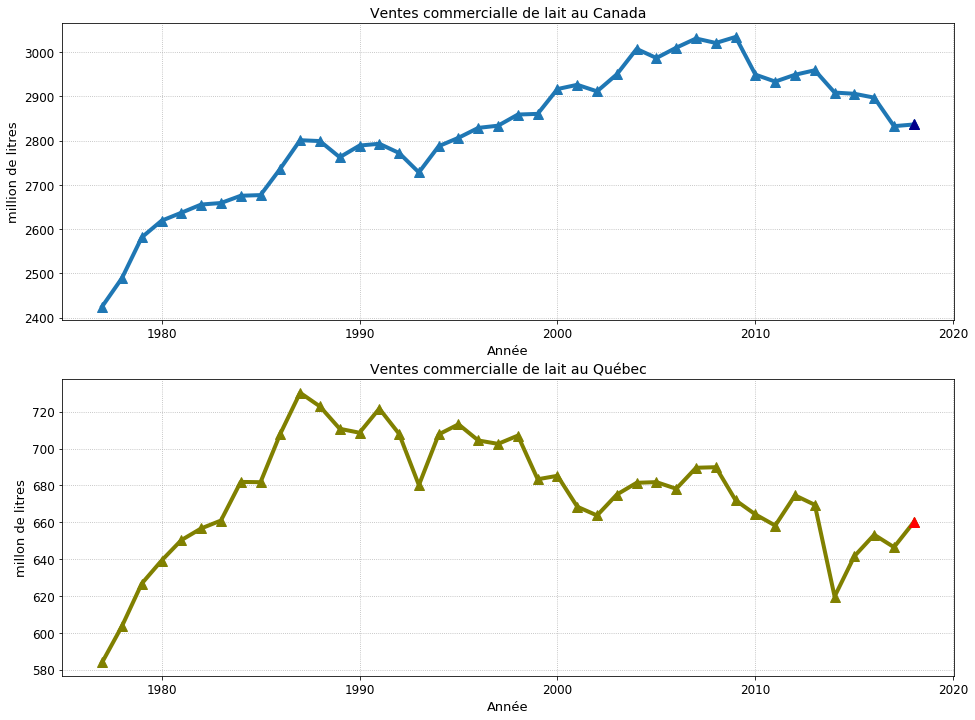

In [58]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))

ax1.plot(ventesCA_tot_year/1000, marker = '^',
         linewidth=4, markersize = 10)
ax1.plot(ventesCA_tot_year[-1:]/1000, marker = '^', c = 'darkblue',
         linewidth=4, markersize = 10)
ax1.set_xlabel('Année')
ax1.set_ylabel('million de litres')
ax1.set_title('Ventes commercialle de lait au Canada')
ax1.grid(linestyle = 'dotted')
#ax1.legend()

ax2.plot(ventesQC_tot_year/1000, marker = '^', c = 'olive',
         linewidth=4, markersize = 10)
ax2.plot(ventesQC_tot_year[-1:]/1000, marker = '^', c = 'red',
         linewidth=4, markersize = 10)
ax2.set_xlabel('Année')
ax2.set_ylabel('millon de litres')
ax2.set_title('Ventes commercialle de lait au Québec')
ax2.grid(linestyle = 'dotted')
#ax2.legend()

#fig.autofmt_xdate(rotation=45)
plt.show()

Source: Statistique Canada. [Tableau 32-10-0114-01 (anciennement CANSIM  003-0012) Ventes commerciales de lait et de crème](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=3210011401)

In [59]:
ventesCA_tot_year.tail()

PÉRIODE DE RÉFÉRENCE
2014    2908626.0
2015    2905875.0
2016    2897161.0
2017    2832738.0
2018    2836556.0
Name: Canada, dtype: float64

In [60]:
ventesQC_tot_year.tail()

PÉRIODE DE RÉFÉRENCE
2014    619708.0
2015    641603.0
2016    653234.0
2017    646471.0
2018    660052.0
Name: Québec, dtype: float64

In [61]:
print('Maximum de ventes commercialles au Canada (2009): {0:0.2f} milliards de litres'.format(
    (ventesCA_tot_year.max()/10**6)))

print('Ventes commercialles au Canada en 2017: {0:0.2f} milliards de litres'.format(
    (ventesCA_tot_year[2017]/10**6)))

print('Ventes commercialles au Québec en 2017: {0:0.0f} millions de litres'.format(
    (ventesQC_tot_year[2017]/10**3)))

Maximum de ventes commercialles au Canada (2009): 3.03 milliards de litres
Ventes commercialles au Canada en 2017: 2.83 milliards de litres
Ventes commercialles au Québec en 2017: 646 millions de litres


Les ventes commerciales totales de lait ont culminé, en atteignant 3,03 milliards de litres au Canada en 2009, puis ont baissé à 2,83 milliards de litres en 2017. Au Québec, les ventes ont diminué régulièrement depuis 1987. En 2017, les ventes commercielles de lait au Québec étaient de 646 millions de litres.

In [62]:
ventesCA_homo = ventes[(ventes['GÉO'] == 'Canada') &
                     (ventes['Produits de base'] == 'Lait homogénéisé')]
ventesCA_homo = ventesCA_homo.rename(columns={"VALEUR": "Lait homogénéisé"})                 
ventesCA_homoG = ventesCA_homo['Lait homogénéisé'].groupby(ventesCA_homo['PÉRIODE DE RÉFÉRENCE'].dt.year)
ventesCA_homo_year = ventesCA_homoG.sum()

ventesCA_lait2 = ventes[(ventes['GÉO'] == 'Canada') &
                     (ventes['Produits de base'] == 'Lait à 2 %')]
ventesCA_lait2 = ventesCA_lait2.rename(columns={"VALEUR": "Lait à 2 %"})                 
ventesCA_lait2G = ventesCA_lait2['Lait à 2 %'].groupby(ventesCA_lait2['PÉRIODE DE RÉFÉRENCE'].dt.year)
ventesCA_lait2_year = ventesCA_lait2G.sum()

In [63]:
ventes[(ventes['GÉO'] == 'Canada') &
       (ventes['Produits de base'] == 'Lait homogénéisé') |
       (ventes['Produits de base'] == 'Lait à 2 %') |
       (ventes['Produits de base'] == 'Lait écrémé') |
       (ventes['Produits de base'] == 'Babeurre') |
       (ventes['Produits de base'] == 'Lait au chocolat et autres laits aromatisés') |
       (ventes['Produits de base'] == 'Lait à 1 %')].tail()

,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Produits de base,UNITÉ DE MESURE,IDENTIFICATEUR D'UNITÉ DE MESURE,FACTEUR SCALAIRE,IDENTIFICATEUR SCALAIRE,VECTEUR,COORDONNÉES,VALEUR,STATUS,SYMBOLE,TERMINÉ,DÉCIMALES
43799,2018-06-01,Autres provinces,NaN,Lait à 2 %,Kilolitres,195,unités,0,v382536,12.2,6361.0,NaN,NaN,NaN,0
43800,2018-06-01,Autres provinces,NaN,Lait écrémé,Kilolitres,195,unités,0,v382548,12.3,1942.0,NaN,NaN,NaN,0
43801,2018-06-01,Autres provinces,NaN,Babeurre,Kilolitres,195,unités,0,v382560,12.4,62.0,NaN,NaN,NaN,0
43802,2018-06-01,Autres provinces,NaN,Lait au chocolat et autres laits aromatisés,Kilolitres,195,unités,0,v382572,12.5,4156.0,NaN,NaN,NaN,0
43808,2018-06-01,Autres provinces,NaN,Lait à 1 %,Kilolitres,195,unités,0,v382525,12.1,2674.0,NaN,NaN,NaN,0


# Répartition du quota de lait total par province

[*Le quota total comprend le quota du lait de consommation et celui du lait de transformation qui était antérieurement appelé le Quota de mise en marché (QMM)*.](http://www.cdc-ccl.gc.ca/CDC/index-fra.php?id=4421)

In [64]:
qt = read_csv('quotatotal.csv')
qt['QCvar'] = qt['QC'].pct_change()*100
qt['CAvar'] = qt['CA'].pct_change()*100
qt.tail()

,Année,BC,AB,SK,MB,MCLO,ON,QC,NB,NS,PE,P5,NL,CA,QCvar,CAvar
5,2013,25.83,25.70,8.95,12.50,72.98,99.91,116.19,5.27,6.75,3.98,232.11,1.89,306.99,0.224273,0.382578
6,2014,26.01,26.77,9.75,13.51,76.03,98.48,124.08,4.43,5.39,4.53,236.91,1.96,314.91,6.790602,2.579889
7,2015,26.68,27.65,9.86,13.84,78.04,100.82,126.54,4.33,5.41,4.55,241.64,1.97,321.65,1.982592,2.140294
8,2016,30.08,29.89,10.41,14.54,84.91,111.80,128.86,5.89,7.56,4.43,258.54,2.54,345.99,1.833412,7.567231
9,2017,32.58,32.37,11.28,15.75,91.98,118.61,136.71,6.25,8.02,4.70,274.29,2.69,368.96,6.091883,6.638920


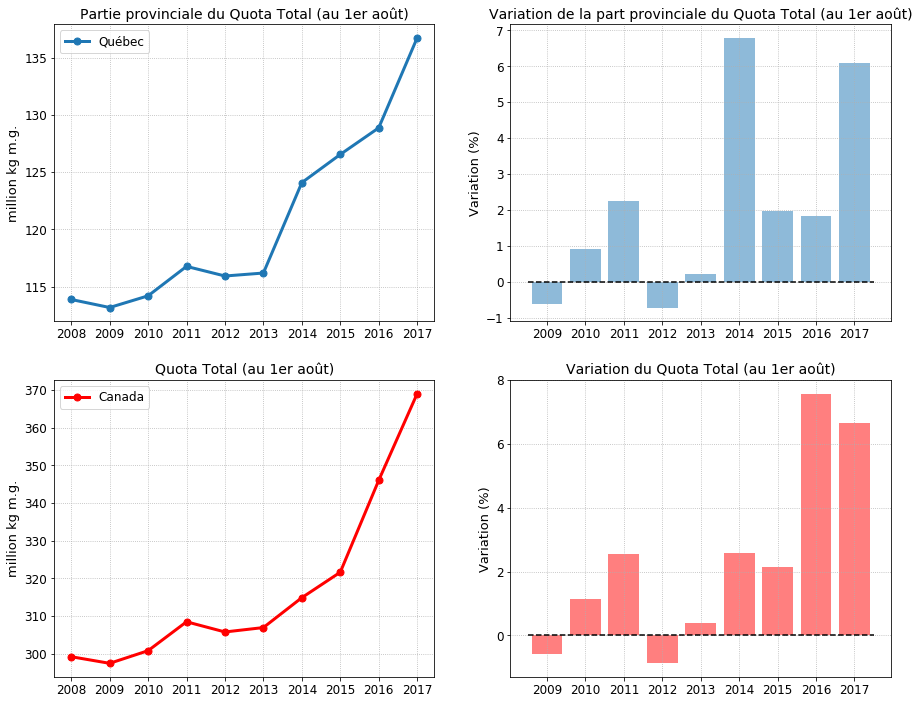

In [65]:
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15, 12))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

axs[0, 0].plot(qt['Année'], qt.QC, marker = 'o',
        label = 'Québec', linewidth=3, markersize=7)
axs[0, 0].set_xticks(np.arange(2008, 2018, step=1))
axs[0, 0].set_ylabel('million kg m.g.')
axs[0, 0].set_title('Partie provinciale du Quota Total (au 1er août)')
axs[0, 0].grid(linestyle = 'dotted')
axs[0, 0].legend()

axs[0, 1].bar(qt['Année'], qt['QCvar'], alpha = 0.5)
axs[0, 1].plot((2008.5,2017.5), (0,0), c = 'black', linestyle = 'dashed')
axs[0, 1].set_xticks(np.arange(2009, 2018, step=1))
axs[0, 1].grid(linestyle = 'dotted')
axs[0, 1].set_ylabel('Variation (%)')
axs[0, 1].set_title('Variation de la part provinciale du Quota Total (au 1er août)')

axs[1, 0].plot(qt['Année'], qt.CA, marker = 'o',
        label = 'Canada', linewidth=3, markersize=7, c='r')
axs[1, 0].set_xticks(np.arange(2008, 2018, step=1))
axs[1, 0].set_ylabel('million kg m.g.')
axs[1, 0].set_title('Quota Total (au 1er août)')
axs[1, 0].grid(linestyle = 'dotted')
axs[1, 0].legend()

axs[1, 1].bar(qt['Année'], qt['CAvar'], alpha = 0.5, color='r')
axs[1, 1].plot((2008.5,2017.5), (0,0), c = 'black', linestyle = 'dashed')
axs[1, 1].set_xticks(np.arange(2009, 2018, step=1))
axs[1, 1].grid(linestyle = 'dotted')
axs[1, 1].set_ylabel('Variation (%)')
axs[1, 1].set_title('Variation du Quota Total (au 1er août)')

#fig.autofmt_xdate(rotation=45)

plt.show()

Source: [Centre Canadien d'Information Laitière (CCIL)](http://www.dairyinfo.gc.ca/index_f.php?s1=dff-fcil&s2=quota&s3=if-tc)

### Le consommateur canadien paie t-il trop chère les produits laitiers?

In [66]:
prix_lait_world = read_csv('prix_lait_consommation.csv', skiprows = 2)
prixCA_US = read_csv('prix.csv', skiprows = 2)
#prixCA_US.head(10)
#prix_lait_world.head()

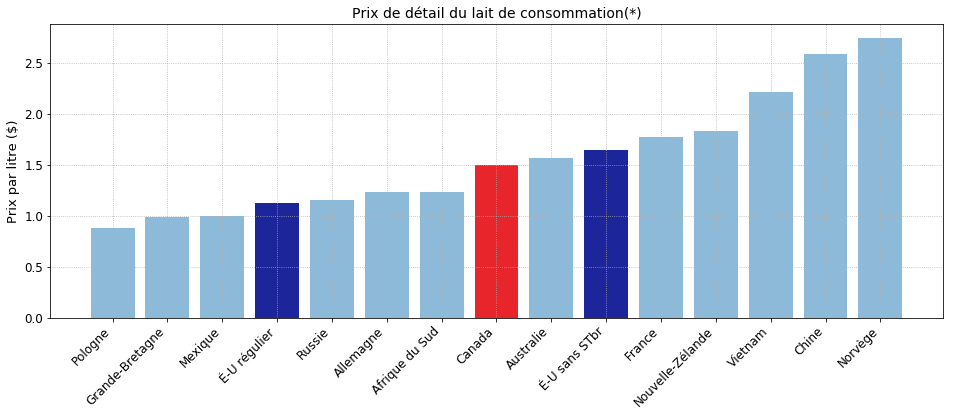

In [67]:
fig, ax = plt.subplots(figsize=(16, 6))

y_pos = np.arange(len(prix_lait_world))
 
ax.bar(y_pos, prix_lait_world.iloc[:,1], align='center', alpha=0.5)
ax.bar(7, prix_lait_world.iloc[7,1], align='center', color = 'r', alpha=0.8)
ax.bar(9, prix_lait_world.iloc[9,1], align='center', color = 'darkblue', alpha=0.8)
ax.bar(3, prix_lait_world.iloc[3,1], align='center', color = 'darkblue', alpha=0.8)

plt.xticks(y_pos, prix_lait_world['Pays'])
ax.set_ylabel('Prix par litre ($)')
ax.set_title('Prix de détail du lait de consommation(*)')
fig.autofmt_xdate(rotation=45)
plt.grid(linestyle = 'dotted')
plt.show()

(*) L'étude a considéré une période de 12 mois se terminant en octobre 2017.
<br>
Source: [Rapport sur le prix du lait frais, Société Nielsen, 2017 et Export Action Global](https://www.exportactionglobal.com/dairyreport/)

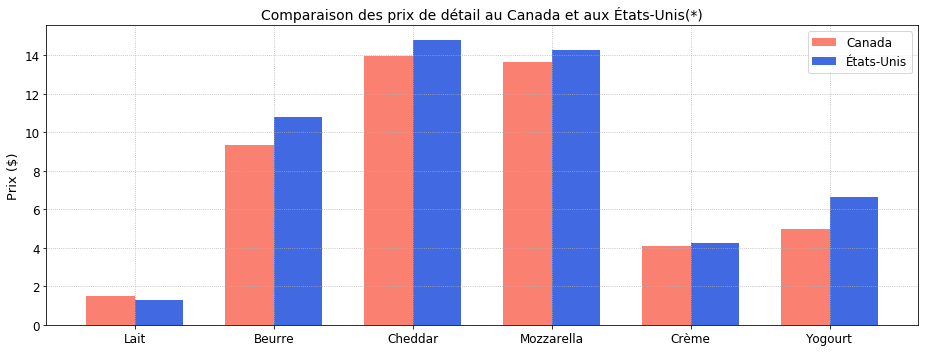

In [68]:
n_groups = 6
 
# create plot
fig, ax = plt.subplots(figsize=(13, 5))

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, prixCA_US.Canada, bar_width,
                 color='salmon',
                 label='Canada')
 
rects2 = plt.bar(index + bar_width, prixCA_US['États-Unis'], bar_width,
                 color='royalblue',
                 label='États-Unis')

plt.ylabel('Prix ($)')
plt.title('Comparaison des prix de détail au Canada et aux États-Unis(*)')
plt.xticks(index + bar_width/2, ('Lait', 'Beurre',
                               'Cheddar',
                               'Mozzarella',
                               'Crème',
                               'Yogourt'))
plt.legend()
plt.grid(linestyle = 'dotted')
#fig.autofmt_xdate(rotation=45)
plt.tight_layout()

plt.show()

(*) L'étude a considéré une période de 12 mois se terminant en octobre 2017.
<br>
Source: [Rapport sur le prix du lait frais, Société Nielsen, 2017 et Export Action Global](https://www.exportactionglobal.com/dairyreport/)

Une étude récente (Rapport sur le prix du lait frais, Nielsen, 2017) montre que les prix de détail moyens du lait frais et d'autres produits laitiers se comparent bien aux prix ailluers dans le monde.

### Et au Québec ?

Au Québec la Régie des marchés agricoles et alimentaires ([RMAAQ](http://www.rmaaq.gouv.qc.ca//index.php?id=49)) gère le prix des produits laitiers en fixant ses prix minimum et maximun au détail. *Pour fixer le prix, la Régie tient compte de la valeur et des caractéristiques du produit, de ses conditions de production, de transport, de transformation et de livraison et de l’utilisation qui en est faite par les marchands de lait ainsi que des intérêts des producteurs, des marchands de lait, des distributeurs et des consommateurs* [(Décision 11155, RMAAQ)](http://www.rmaaq.gouv.qc.ca/fileadmin/DocuCentre/Decision/2017/11155.pdf). La demande, du consommateur et du marché, et l'intérêt des producteurs et des détaillants sont pris en compte.

Dans d'autres provinces, le lait est considéré comme un produit d’appel et le prix au détail n'est pas fixé. *Les détaillants ne font pas d'argent avec le lait, ils peuvent même en perdre. Le but, c'est de vous offrir un produit de base à faibles coûts et de vous attirer dans le magasin pour vous vendre d’autres produits* [(Fillion 2017)](https://ici.radio-canada.ca/nouvelle/1036806/gestion-de-offre-pourquoi-lait-coute-plus-cher-au-quebec).

*Alors, si l'on veut voir les prix baisser au Québec, ce n'est pas l'abandon de la gestion de l'offre qui va servir cet intérêt. C'est plutôt un débat sur la fixation des prix et la possibilité de considérer le lait comme un produit d'appel dans les magasins qui pourrait être lancé* [(Fillion 2017)](https://ici.radio-canada.ca/nouvelle/1036806/gestion-de-offre-pourquoi-lait-coute-plus-cher-au-quebec).

# Un modèle économétrique pour la gestion en continu du quota

La CCL/CCGAL a mentionnée dans son dernier [rapport annuel 2016-2017](http://www.cdc-ccl.gc.ca/CDC/index-fra.php?link=125) son intention de modifier sa méthodologie d'ajuste de quota pour mieux répondre à la variation de la demande. Un modèle économétrique d'estimation de quota dynamique me semble plus approprié. C'est le cas de la régression avec les données de séries temporelles de fréquence mensuelle.

Après avoir compris le système complexe de gestion de l'offre au Canada et au Québec et avoir trouvé les sources de données, cela me semble être une tâche "plus simple" !! Les jeux de données que je trouve les plus pertinents sont disponibles ici:

1. [Ventes commerciales de lait et de crème: 32-10-0114-01 (anciennement CANSIM  003-0012)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=3210011401)
1. [Production et utilisation de lait: 32-10-0113-01 (anciennement CANSIM  003-0011)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=3210011301)
1. [Fabrication de sous-produits concentrés de lait: 32-10-0247-01 (anciennement CANSIM  003-0029)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=3210024701)
1. [Recettes monétaires des ventes de lait et de crème hors ferme: 32-10-0110-01 (anciennement CANSIM  003-0008)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=3210011001)
1. [Stocks de certains produits laitiers: 32-10-0001-01 (anciennement CANSIM  003-0033)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=3210000101)
1. [Prix de détail moyens mensuels pour les aliments et autres produits sélectionnés: 18-10-0002-01 (anciennement CANSIM  326-0012)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=1810000201)
1. [Production de la matière grasse (x 1 000): 32-10-0132-01 (anciennement CANSIM  003-0034)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=3210013201)
1. [Indice des prix à la consommation, données mensuelles non désaisonnalisées: 18-10-0004-03 (anciennement CANSIM  326-0020)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=1810000403)
1. [Importations et exportations de produits laitiers](http://www.dairyinfo.gc.ca/index_f.php?s1=dff-fcil#trade)

In [47]:
?read_csv

In [48]:
qt_ts = read_csv('quotatotal.csv', parse_dates=['Année'], infer_datetime_format=True,
                 index_col='Année')
qt_ts.head(15)

,BC,AB,SK,MB,MCLO,ON,QC,NB,NS,PE,P5,NL,CA
Année,,,,,,,,,,,,,
2008-01-01,24.83,24.72,8.62,12.03,70.20,97.51,113.88,5.16,6.61,3.90,227.06,2.00,299.26
2009-01-01,24.77,24.66,8.60,12.00,70.03,96.91,113.18,5.12,6.56,3.87,225.66,1.83,297.51
2010-01-01,25.23,25.11,8.75,12.22,71.31,97.78,114.20,5.17,6.62,3.91,227.68,1.88,300.86
2011-01-01,26.08,25.95,9.04,12.62,73.69,100.00,116.77,5.29,6.77,3.99,232.83,2.00,308.52
2012-01-01,25.75,25.61,8.93,12.46,72.74,99.28,115.93,5.25,6.73,3.97,231.15,1.93,305.82
2013-01-01,25.83,25.70,8.95,12.50,72.98,99.91,116.19,5.27,6.75,3.98,232.11,1.89,306.99
2014-01-01,26.01,26.77,9.75,13.51,76.03,98.48,124.08,4.43,5.39,4.53,236.91,1.96,314.91
2015-01-01,26.68,27.65,9.86,13.84,78.04,100.82,126.54,4.33,5.41,4.55,241.64,1.97,321.65
2016-01-01,30.08,29.89,10.41,14.54,84.91,111.80,128.86,5.89,7.56,4.43,258.54,2.54,345.99


In [106]:
from pandas import concat, DataFrame, Timestamp

qt_tsf = DataFrame({'QC':['nan']}, index=[Timestamp('20180101')])

# 3.4.2. One-Step Forecast without Re-Estimation
rwdf2 = qt_ts.shift(1)['2014-01-02':]
rwdf2['SPY.DiffMean'] = dmeanf1
rwdf2 = rwdf2.sum(axis=1)
rwdf2 = pd.DataFrame(rwdf2).set_index(spyf.index)

In [107]:
rwdf1

,QC
2018-01-01,136.71


In [80]:
dqt_ts = qt_ts-qt_ts.shift(1)

In [81]:
dqt_ts

,BC,AB,SK,MB,MCLO,ON,QC,NB,NS,PE,P5,NL,CA
Année,,,,,,,,,,,,,
2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01,-0.06,-0.06,-0.02,-0.03,-0.17,-0.60,-0.70,-0.04,-0.05,-0.03,-1.40,-0.17,-1.75
2010-01-01,0.46,0.45,0.15,0.22,1.28,0.87,1.02,0.05,0.06,0.04,2.02,0.05,3.35
2011-01-01,0.85,0.84,0.29,0.40,2.38,2.22,2.57,0.12,0.15,0.08,5.15,0.12,7.66
2012-01-01,-0.33,-0.34,-0.11,-0.16,-0.95,-0.72,-0.84,-0.04,-0.04,-0.02,-1.68,-0.07,-2.70
2013-01-01,0.08,0.09,0.02,0.04,0.24,0.63,0.26,0.02,0.02,0.01,0.96,-0.04,1.17
2014-01-01,0.18,1.07,0.80,1.01,3.05,-1.43,7.89,-0.84,-1.36,0.55,4.80,0.07,7.92
2015-01-01,0.67,0.88,0.11,0.33,2.01,2.34,2.46,-0.10,0.02,0.02,4.73,0.01,6.74
2016-01-01,3.40,2.24,0.55,0.70,6.87,10.98,2.32,1.56,2.15,-0.12,16.90,0.57,24.34


In [27]:
?set_index

Object `set_index` not found.


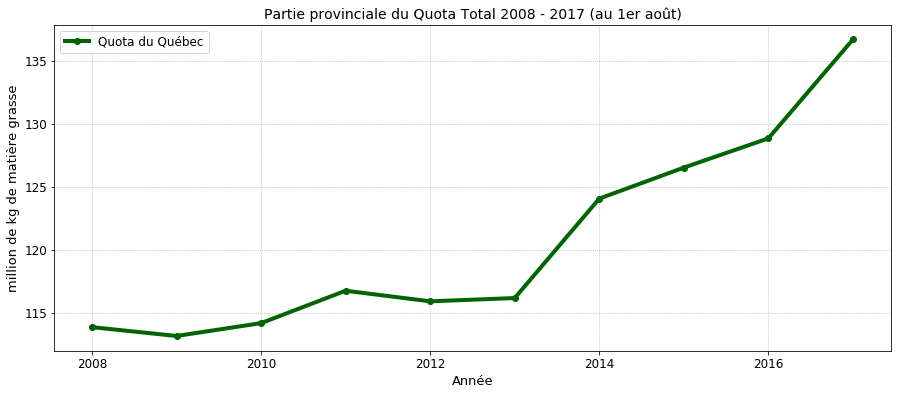

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(qt_ts.QC, c = 'darkgreen', linewidth = 4,
        marker = 'o', label='Quota du Québec')
#ax.set_xticks(np.arange(2013, 2018, step=1))
ax.set_xlabel('Année')
ax.set_ylabel('million de kg de matière grasse')
ax.set_title('Partie provinciale du Quota Total 2008 - 2017 (au 1er août)')
ax.grid(linestyle = 'dotted')
ax.legend()

plt.show()

# Problématique

1. **Devrait-on augmenter le quota pour 2019 ?**<br>
Oui, environ 3-4%.

2. **Le consommateur paie t-il trop chère ?**

3. **Les quotas sont-ils trop bas ?**

4. **Quelle est la progression de l'industrie laitière au Québec au cours des dix dernières années ?**

5. **Est-ce que l'écart entre la production et les quotas est stable dans le temps ?**

6. **Comment se compare les prix des produits laitiers au Québec versus le reste du Canada ?**

7. **Que fait-on avec le lait de surproduction, comment se porte le marché du lait en poudre au Québec ?**<br>
La demande du consommateur a se modifiée ces dernières années. Avec la baisse de la demande du lait de consommation au profit du beurre et du fromage le beurre est fabriqué à partir du lait entier. Cela produit un surplus des solides non gras (protéine du lait). La question du lait en poundre... manque

Référeces:

1. [Borde, Valérie, ***Les défis du lait québécois*** mai 2016, *L'actualité*](https://lactualite.com/societe/2016/05/10/les-defis-du-lait-quebecois/)
1. [The Boston Consulting Group, ***Analyse des impacts potentiels de la fin de la gestion de l'offre dans l'industrie laitière au Canada*** décembre 2015](https://www.agrireseau.net/economie-et-gestion/documents/91368)
1. [Boyer, Marcel; Charlebois, Sylvain, ***La gestion de l’offre des produits agricoles : un système coûteux pour les consommateurs*** août 2007, *IEDM*](https://www.iedm.org/fr/588-la-gestion-de-loffre-des-produits-agricoles-un-systeme-couteux-pour-les-consommateurs)
1. [Commission Canadienne du lait, ***Rapport annuel de la CCL 2016-2017*** août 2017](http://www.cdc-ccl.gc.ca/CDC/index-fra.php?link=125)
1. [Duhamel, Pierre, ***Lait: une histoire de vaches… et de sous*** juillet 2013, *L'actualité*](https://lactualite.com/lactualite-affaires/2013/07/23/le-lait-une-histoire-de-vaches-et-de-sous/)
1. [Dumais, Mario; Chassin, Youri, ***Les politiques néfastes de gestion de l’offre du Canada*** juin 2015, *IEDM*](http://www.iedm.org/fr/53769-le-point-les-politiques-nefastes-de-gestion-de-l-offre-du-Canada)
1. [Export Action Global, ***Les Systèmes Laitiers dans le Monde: Les consommateurs et les producteurs canadiens s’en tirent-ils mieux avec le modèle canadien?*** avril 2018](https://www.exportactionglobal.com/dairyreport/)
1. [Fillion, Gérald, ***Gestion de l'offre : pourquoi le lait coûte-t-il plus cher au Québec?*** mai 2017, ici.radio-canada.ca](https://ici.radio-canada.ca/nouvelle/1036806/gestion-de-offre-pourquoi-lait-coute-plus-cher-au-quebec)
1. [Gouin, Daniel-Mercier; Doyon, Maurice, ***La gestion de l'offre attaquée à coups de sophismes*** mai 2017, *La Presse*](http://plus.lapresse.ca/screens/c41361e6-1861-4267-b962-f87e74a758d0__7C___0.html)
1. [Grant, Michael; Barichello, Richard; Liew, Mark; Gill, Vijay, ***Réformer la gestion de l’offre laitière : Plaidoyer pour la croissance*** 2014, Ottawa, Le Conference Board du Canada](https://www.conferenceboard.ca/e-library/abstract.aspx?did=6084)
1. [Heminthavong, Khamla, ***Le mécanisme de la gestion de l’offre au Canada*** décembre 2015, *Division de l’économie, des ressources et des affaires internationales*, 2015-138-F](https://bdp.parl.ca/Content/LOP/ResearchPublications/2015-138-f.html?cat=agriculture)
1. [L'Institut économique de Montréal, ***Production laitière : les coûts de la gestion de l’offre au Canada*** février 2005, *Les Notes Économiques*](http://www.caaaq.gouv.qc.ca/userfiles/File/MEIDairy%20fev05_FRENCH.pdf)
1. [L'Union Paysanne, ***Vers une gestion de l’offre 2.0 au Canada*** novembre 2014](https://unionpaysanne.com/publications/)
1. [Les Producteurs de lait du Québec, ***Bilan annuel du marché laitier des Producteurs de lait du Québec - Croissance et investissements dans le secteur laitier, atténués par l'entrée en vigueur des accords commerciaux*** avril 2018, Cision](https://www.newswire.ca/fr/news-releases/bilan-annuel-du-marche-laitier-des-producteurs-de-lait-du-quebec---croissance-et-investissements-dans-le-secteur-laitier-attenues-par-lentree-en-vigueur-des-accords-commerciaux-679406953.html)
1. [Les Protucteurs Laitiers du Canada, ***Rapport Annuel 2017***](http://lait.org/notre-organisation/rapport-annuel/)
1. [Les Protucteurs Laitiers du Canada, ***Pourquoi la gestion de l’offre fonctionne-t-elle pour les Canadiens?*** 2017](https://www.producteurslaitiers.ca/que-faisons-nous/a-propos-de-la-gestion-de-l-offre/pourquoi-la-gestion-de-l-offre-fonctionne-t-elle-pour-les-canadiens)
1. [Les Protucteurs Laitiers du Canada, ***Les producteurs remettent les pendules à l'heure au sujet de la gestion de l'offre deuxième partie*** 2015, communiqué](https://www.producteurslaitiers.ca/salle-de-presse/nouvelles/politique/les-producteurs-remettent-les-pendules-a-l-heure-au-sujet-de-la-gestion-de-l-offre-deuxieme-partie)
1. [Lippert, Owen, ***Milk: A Perfect Mess Revisited*** 2018, iPOLITICS](https://ipolitics.ca/article/milk-a-perfect-mess-revisited/)
1. [Lippert, Owen, ***The Perfect Food in a Perfect Mess: The Cost of Milk in Canada*** 2001, *Public Policy Sources*, 52, The Fraser Institute](https://www.fraserinstitute.org/sites/default/files/PerfectFoodinaPerfectMess.pdf)
1. [Régie des marchés agricoles et alimentaires du Québec, ***Rapport annuel de gestion (2016-2017)*** septembre 2017](http://www.rmaaq.gouv.qc.ca//index.php?id=12)
1. [St. Pierre, Michelle, ***Changements dans les préférences des Canadiens relativement au lait et aux produits laitiers*** avril 2017, *Regards sur l'industrie agro-alimentaire et la communauté agricole*, 21-004-X](https://www150.statcan.gc.ca/n1/pub/21-004-x/2017001/article/14786-fra.htm)